## 0.0. IMPORTS

In [49]:

import math
import numpy as np
import pandas as pd
import inflection
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import Image
from IPython.core.display import HTML

### 0.1. Helper Functions

### 0.2. LOADING DATA

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

## 1.0. PASSO 01 - DESCRICAO DOS DADOS

In [3]:
# copia do dataset original
df1 = df_raw.copy()

In [4]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [5]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### 1.1. Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

#transformando nome de colunas em snakecase
snakecase = lambda x: inflection.underscore( x )
cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

### 1.2. Data Dimensions

In [8]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Columns: {df1.shape[1]}')

Number of Rows: 1017209
Number of Columns: 18


### 1.3. Data Types

In [9]:
df1['date'] = pd.to_datetime(df1['date'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4. Check NA

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5. Fillout NA

In [11]:
#competition_distance -> preenchendo o valor de competition distance com valor elevado (200000) se o valor for nan
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan(x) else x)   

#competition_open_since_month -> aplicando a mês da data de venda corrente para a coluna 'competition_open_since_month', caso o valor seja nan
# se ao fazer a subtração de meses para saber quando tempo o concorrente está aberto, vai dar zero.
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since00_month'], axis =1)

#competition_open_since_year -> mesma lógica acima
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis =1)
                  
#promo2_since_week -> mesma lógica acima, mas para a promo2 (pega a semana da data 'date' e transforma em semana.)
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis =1)

#promo2_since_year  -> mesma lógica acima
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis =1)         

# limpando os NAs finais relativa as promos e continuação com a promo2 e seus intervalos
# proposta é criar um array /lista da coluna 'promo_interval' para checar se o mês de venda está dentro desse intervalo
#dicionario para converter meses numéricos em meses objetc (string)
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec',}
# preenchendo NA com 0 -> se não tem a informação é que não participou
df1['promo_interval'].fillna(0, inplace=True)
# criando a coluna month_map -> pegando o mês da coluna "date" (data de vendas)
df1['month_map'] = df1['date'].dt.month.map(month_map)
#criando coluna 'is_promo' para checar se a coluna month_map está no intervalo 'promo_interval'
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)



            

In [12]:
df1.sample(5).T

,645224,671936,146102,966109,899359
store,425,377,38,190,340
day_of_week,6,3,7,5,2
date,2013-11-30 00:00:00,2013-11-06 00:00:00,2015-03-22 00:00:00,2013-02-15 00:00:00,2013-04-16 00:00:00
sales,2699,7944,0,5473,4779
customers,352,943,0,536,643
open,1,1,0,1,1
promo,0,1,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,1,0
store_type,d,a,d,a,a


### 1.6. Change Types

In [13]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### 1.7. Descriptive Statistical

In [14]:
num_attributes = df1.select_dtypes( include= ['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude= ['int64', 'float64', 'datetime64[ns]'] )

#### 1.7.1 Numerical Attributes

In [15]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply(np.mean) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate -> m=metrics
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m 


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/tmp/ipykernel_137348/3380288980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['competition_distance'])


<AxesSubplot: xlabel='competition_distance', ylabel='Density'>

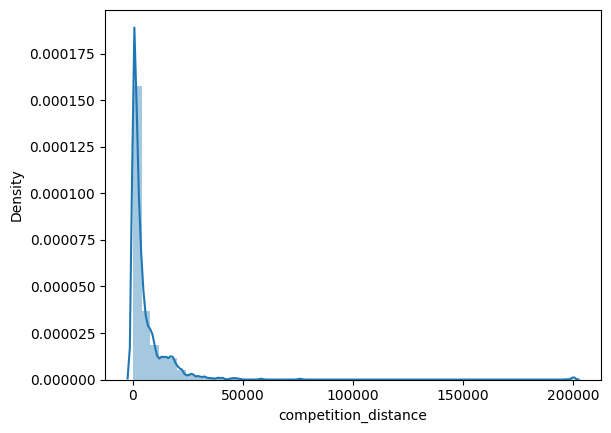

In [16]:
sns.distplot(df1['competition_distance'])

#### 1.7.2 Categorical Attributes

In [17]:
cat_attributes.apply( lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

/tmp/ipykernel_137348/1460514853.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state_holiday', y='sales', data=aux1, palette='Set1')
/tmp/ipykernel_137348/1460514853.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='store_type', y='sales', data=aux1, palette='Set2')
/tmp/ipykernel_137348/1460514853.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='assortment', y='sales', data=aux1, palette='Set3')


<AxesSubplot: xlabel='assortment', ylabel='sales'>

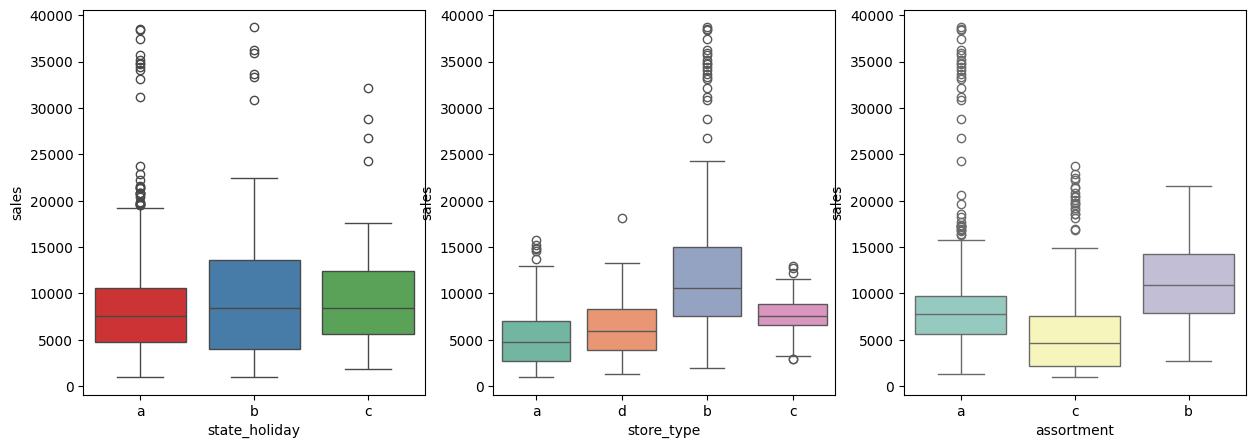

In [37]:
aux1 = df1[ (df1['state_holiday'] != '0') & (df1['sales'] > 0)]

# Ajuste a largura da figura para melhor espaçamento
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1, palette='Set1')

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1, palette='Set2')

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1, palette='Set3')

## 2.0. PASSO 02 - FEATURE ENGINEERING

In [19]:
df2 = df1.copy()

### 2.1. Mapa Mental de Hipoteses

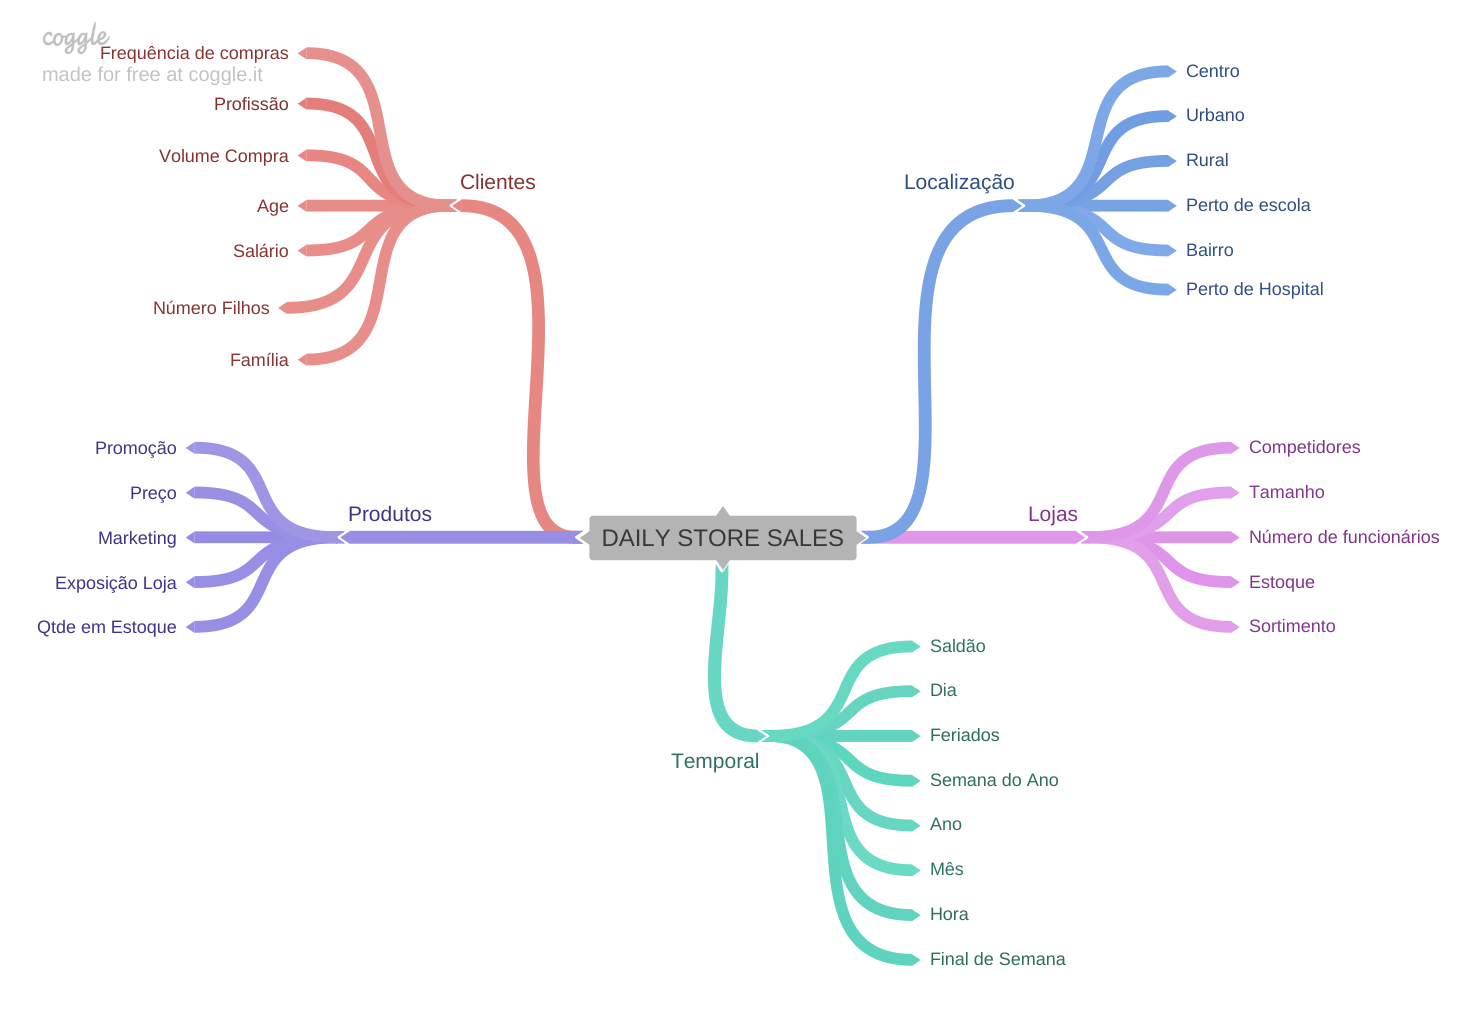

In [20]:
Image('img/mindmap_hypothesis.png')

### 2.1. Criacao das Hipoteses

#### 2.1.1. Hipoteses Loja

**1.** Lojas com maior quadro de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimento deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores há mais tempo deveriam vender mais.

#### 2.1.2. Hipoteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produtos deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais. 

**4.** Lojas com promoções mais agressivas (descontos maiores) deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais. 

**6.** Lojas com mais dias de promoção deveriam vender mais. 

**7.** Lojas com mais promoções consecutivas deveriam vender mais. 

#### 2.1.3. Hipoteses Tempo

**1.** Lojas abertas durante o feriado do Natal deveriam vender mais. 

**2.** Lojas deveriam vender mais ao longo dos anos. 

**3.** Lojas deveriam vender mais no segundo semestre do ano. 

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês. 

**5.** Lojas deveriam vender menos aos finais de semana. 

**6.** Lojas deveriam vender menos durante os feriados escolares. 

### 2.2. Lista Final de Hipóteses

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores há mais tempo deveriam vender mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais. 

**5.** Lojas com mais dias de promoção deveriam vender mais. 

**6.** Lojas com mais promoções consecutivas deveriam vender mais. 

**7.** Lojas abertas durante o feriado do Natal deveriam vender mais. 

**8.** Lojas deveriam vender mais ao longo dos anos. 

**9.** Lojas deveriam vender mais no segundo semestre do ano. 

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês. 

**11.** Lojas deveriam vender menos aos finais de semana. 

**12.** Lojas deveriam vender menos durante os feriados escolares. 

### 2.3. Feature Engineering

In [21]:
# Derivando as variáveis necessárias

# year
df2['year'] = df2['date'].dt.year 
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W')
# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis = 1 )
df2['competition_time_month'] = ( (df2['date'] - df2['competition_since'])/30).apply( lambda x: x.days).astype(int)
# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ( (df2['date'] - df2['promo_since'])/7).apply( lambda x: x.days).astype(int)
# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')
# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [22]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## 3.0. PASSO 03 - FILTRAGEM DE VARIÁVEIS

In [23]:
df3 = df2.copy()

In [24]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


### 3.1. Filtragem das linhas

In [25]:
#queremos apenas as linhas de vendas > 0 e quando a loja está aberta (open != 0) para fazer a análise
df3 = df3[ (df3['open'] != 0) & (df3['sales'] > 0) ]

### 3.2. Selecao das Colunas

In [26]:
# filtrando (dropando) colunas que não serão utilizadas na análise
# customers é importante porém é uma restrição, uma vez que teríamos que criar um modelo de predição de clientes
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
# axis = 0 -> linhas, axis = 1 -> colunas
df3 = df3.drop(cols_drop, axis=1)

## 4.0. PASSO 04 - ANALISE EXPLORATORIA DOS DADOS

In [27]:
df4 = df3.copy()

### 4.1. Analise Univariada

#### 4.1.1. Response Variable

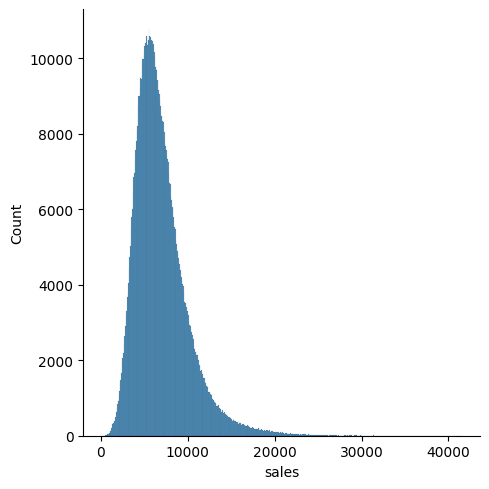

In [28]:
sns.displot( df4['sales'])

#### 4.1.2. Numerical Variable

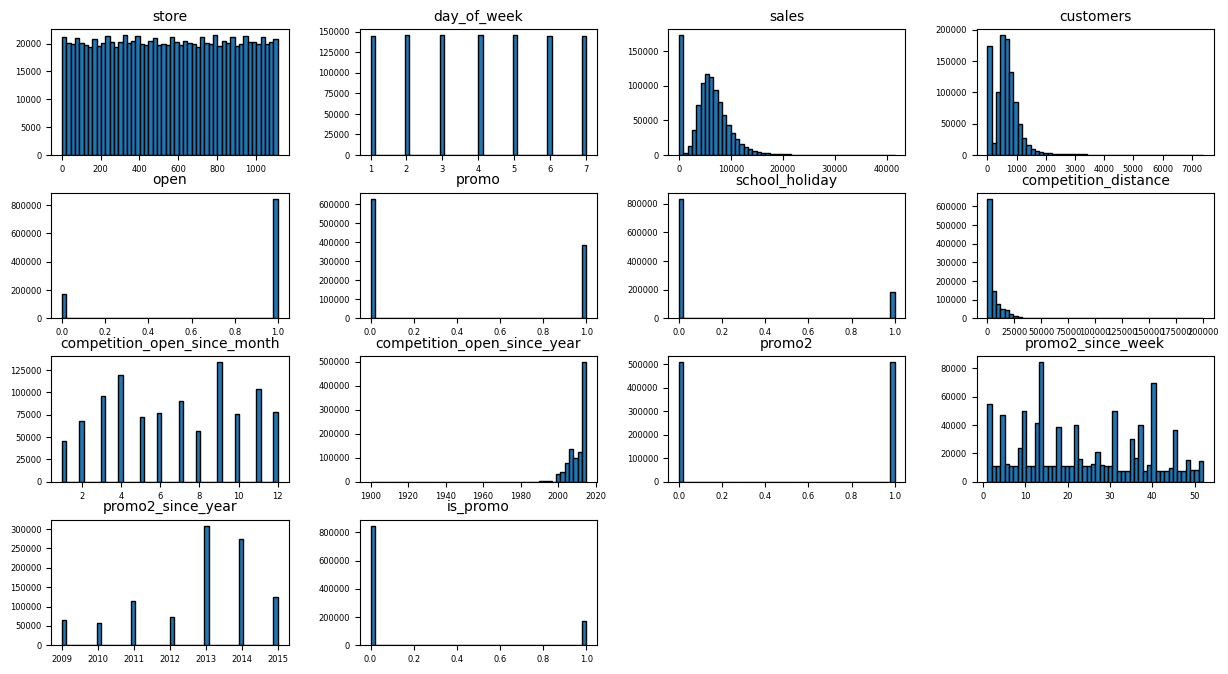

In [29]:
# Criar o histograma e obter o objeto Axes
axes = num_attributes.hist(bins=50, figsize=(15, 8), grid=False, edgecolor='black')

# Ajustar o tamanho da fonte do título e dos rótulos dos eixos
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=10)  # Ajuste o tamanho da fonte do título
    ax.tick_params(axis='both', labelsize=6)  # Ajuste o tamanho da fonte dos rótulos dos eixos

plt.show()

#### 4.1.3. Categorical Variable

In [86]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

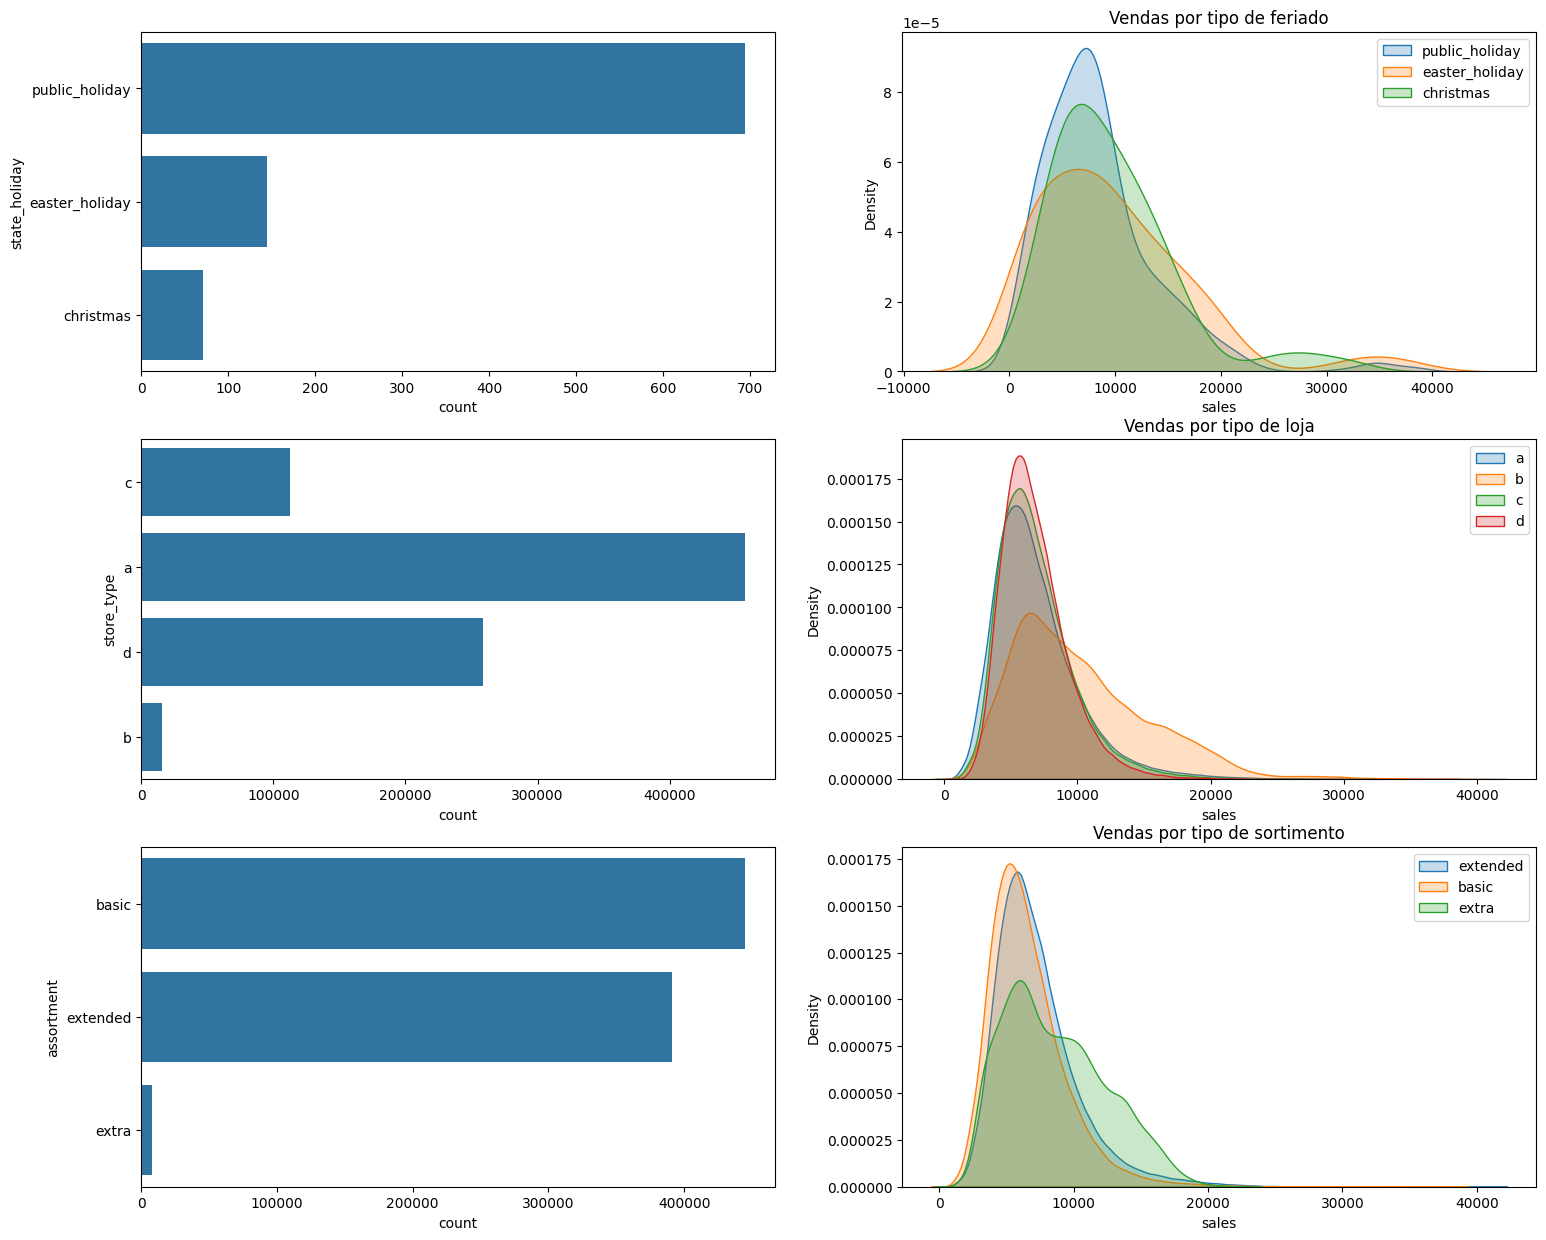

In [42]:
# Ajuste a largura da figura para melhor espaçamento e tamanho dos gráficos
plt.figure(figsize=(18, 15))

#state_holiday
plt.subplot(3,2,1)
a = df4[ df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'])

plt.subplot(3,2,2)
sns.kdeplot( df4[ df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True)
sns.kdeplot( df4[ df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill=True)
sns.kdeplot( df4[ df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True)
plt.title('Vendas por tipo de feriado')
plt.legend()

#store_type
plt.subplot(3,2,3)
sns.countplot( df4['store_type'])

plt.subplot(3,2,4)
sns.kdeplot( df4[ df4['store_type'] == 'a']['sales'], label='a', fill=True)
sns.kdeplot( df4[ df4['store_type'] == 'b']['sales'], label='b', fill=True)
sns.kdeplot( df4[ df4['store_type'] == 'c']['sales'], label='c', fill=True)
sns.kdeplot( df4[ df4['store_type'] == 'd']['sales'], label='d', fill=True)
plt.title('Vendas por tipo de loja')
plt.legend()

#assortment
plt.subplot(3,2,5)
sns.countplot( df4['assortment'])

plt.subplot(3,2,6)
sns.kdeplot( df4[ df4['assortment'] == 'extended']['sales'], label='extended', fill=True)
sns.kdeplot( df4[ df4['assortment'] == 'basic']['sales'], label='basic', fill=True)
sns.kdeplot( df4[ df4['assortment'] == 'extra']['sales'], label='extra', fill=True)
plt.title('Vendas por tipo de sortimento')
plt.legend()

### 4.2. Analise Bivariada

#### **H1.** Lojas com maior sortimento deveriam vender mais.
**FALSA** Lojas com maior sortimento vendem MENOS.

<AxesSubplot: xlabel='year_week'>

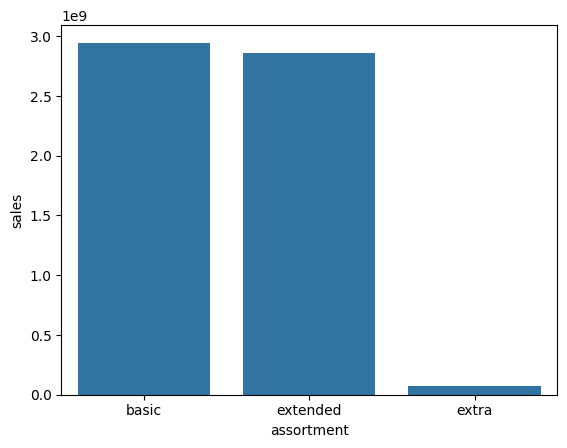

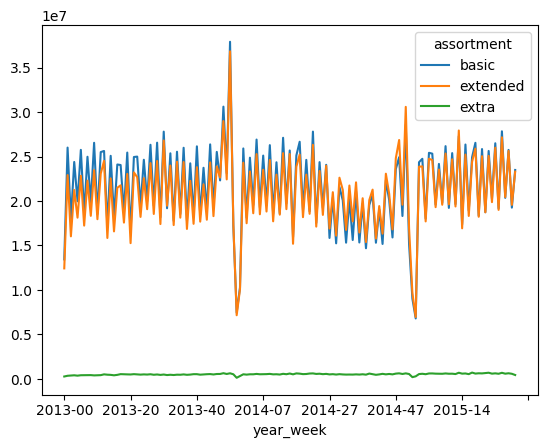

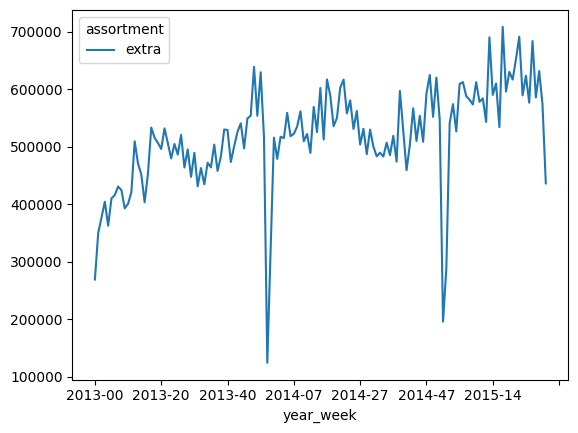

In [99]:
# check de qual tipo de sortimento vende mais
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1);

#analisando a evolução de vendas semanal de cada sortimento
aux2 = df4[ ['year_week','assortment', 'sales']].groupby( ['year_week','assortment' ]).sum().reset_index()
aux2.pivot( index='year_week', columns='assortment', values='sales').plot()

aux3 = aux2[ aux2['assortment'] == 'extra']
aux3.pivot( index='year_week', columns='assortment', values='sales').plot()

#### **H2.** Lojas com competidores mais próximos deveriam vender menos.

**FALSA** Lojas com competidores mais próximos vendem mais. 


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

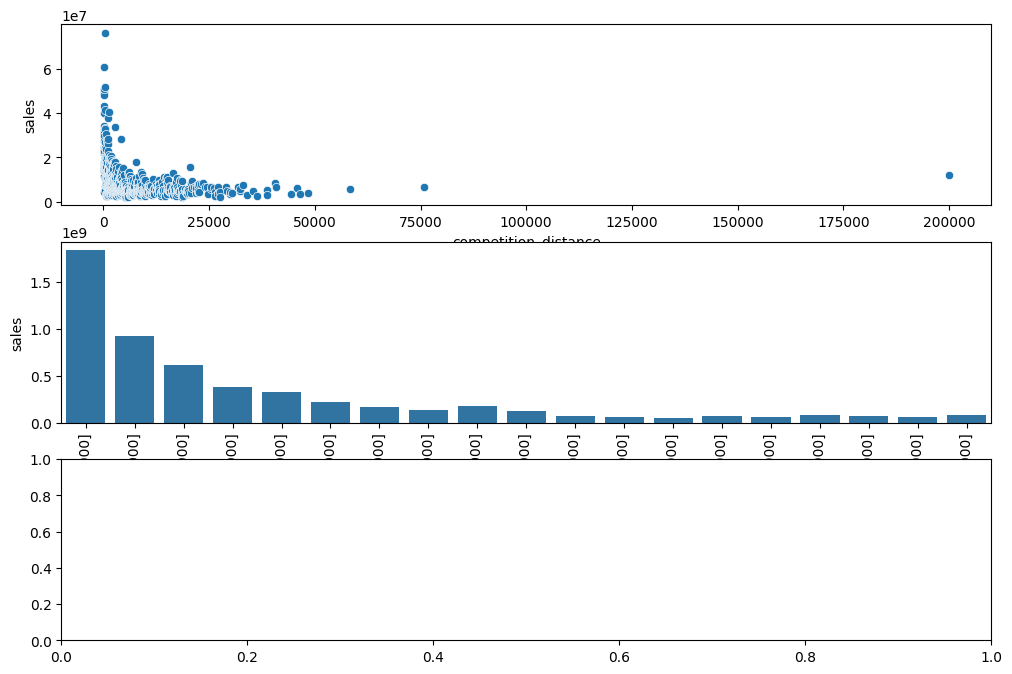

In [135]:
plt.figure(figsize=(12, 8))

aux1 = df4[ ['competition_distance', 'sales'] ].groupby('competition_distance').sum().reset_index()

plt.subplot(3,1,1)
sns.scatterplot(x='competition_distance', y='sales', data=aux1)

plt.subplot(3,1,2)
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux2)
plt.xticks(rotation =90);

plt.subplot( 3,1,3 )
sns.heatmap( aux1.corr( method='pearson'), annot=True)

#### **H3.** Lojas com competidores há mais tempo deveriam vender mais.

**FALSA** Lojas com competidores há mais tempo vendem menos. 

<AxesSubplot: >

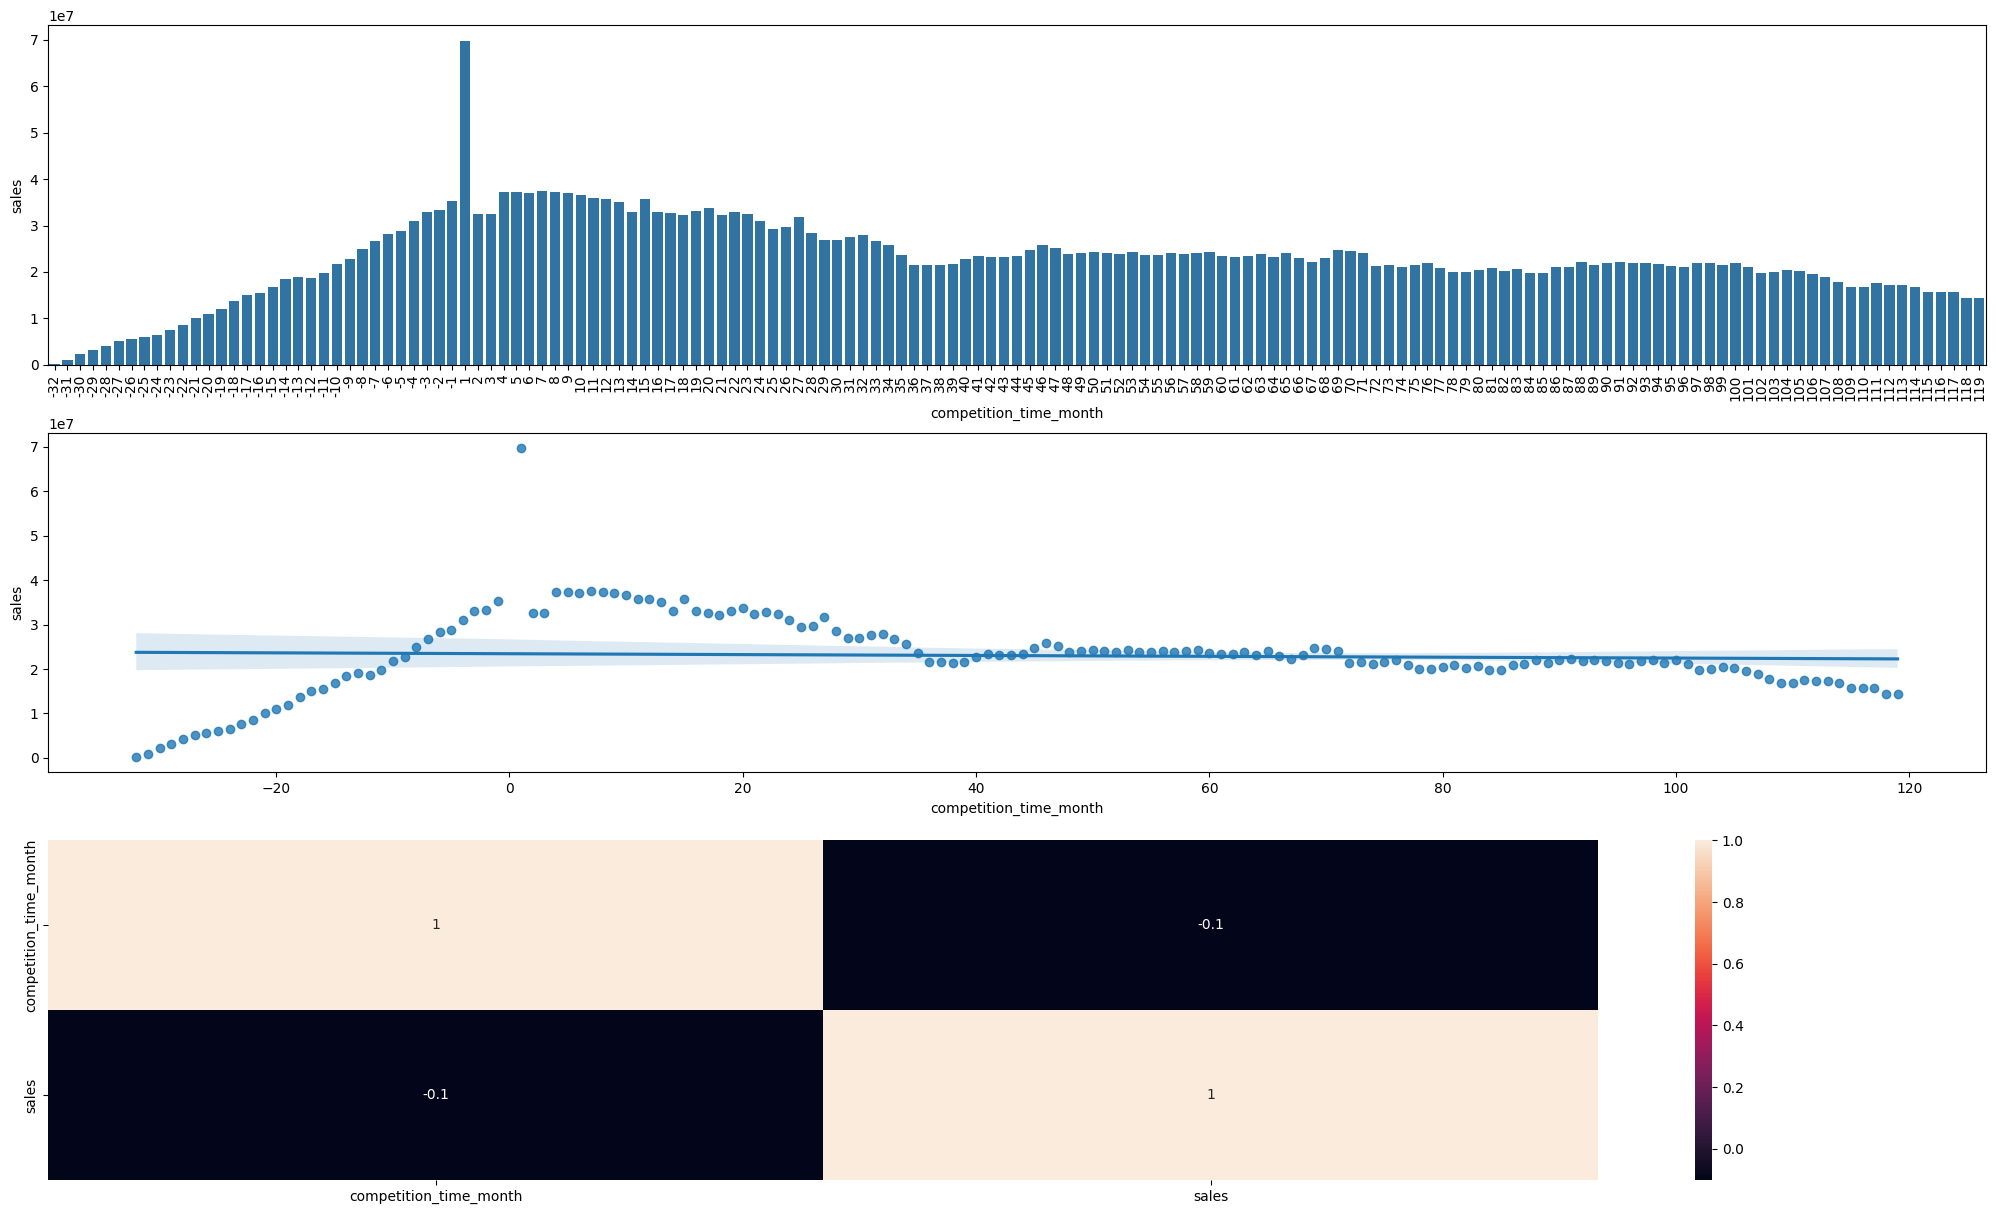

In [132]:
plt.figure(figsize=(25, 15))

plt.subplot(3, 1, 1)
aux1 = df4[ ['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[ (aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]
sns.barplot(x='competition_time_month', y='sales', data=aux2)
plt.xticks(rotation = 90);

plt.subplot(3,1,2)
sns.regplot(x='competition_time_month', y='sales', data=aux2)

plt.subplot(3,1,3)
sns.heatmap( aux1.corr( method='pearson'), annot=True)

#### **H4.** Lojas com promoções ativas por mais tempo deveriam vender mais. 

FALSA: Lojas com promoções ativas por mais tempo vendem menos, a partir de um certo momento.

<AxesSubplot: >

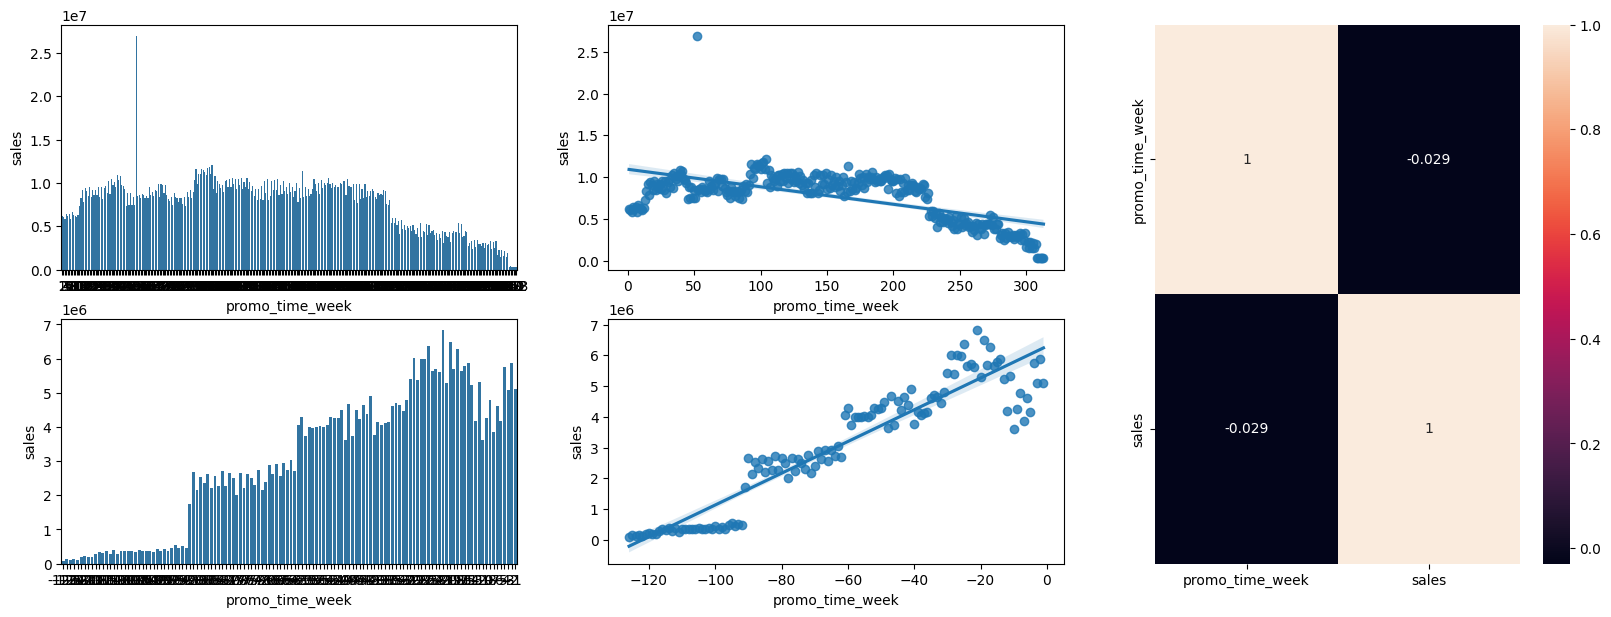

In [64]:
plt.figure(figsize=(20, 7))

# selecionando vendas e a coluna que criamos de tempo até a promoção extendida
aux1 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

grid = GridSpec(2, 3)

# vendas com promo extendida ao longo do tempo
plt.subplot( grid[0,0])
aux2 = aux1[aux1['promo_time_week'] > 0] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2)
# plt.xticks( rotation=90)

# tendência das vendas com promo extendida
plt.subplot( grid[0,1])
sns.regplot( x='promo_time_week', y='sales', data=aux2)

# vendas com promo regular ao longo do tempo
plt.subplot( grid[1,0])
aux3 = aux1[aux1['promo_time_week'] < 0] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3)

# tendência das vendas com promo regular
plt.subplot( grid[1,1])
sns.regplot( x='promo_time_week', y='sales', data=aux3)

plt.subplot( grid[:,2])
sns.heatmap(aux1.corr( method='pearson'), annot=True)

#### <s>**H5.** Lojas com mais dias de promoção deveriam vender mais. </s>

##### segundo roundo do CRISP

#### **H6.** Lojas com mais promoções consecutivas deveriam vender mais.

**FALSA** Lojas com mais promoções consecutivas vendem menos.

In [68]:
# checando se: quando tempos promo2 ativa vendemos mais ou apenas com a promo ativa:
df4[['promo', 'promo2', 'sales']].groupby( ['promo', 'promo2'] ).sum().sort_values(by='sales', ascending=True).reset_index()

,promo,promo2,sales
0,0,1,1289362241
1,1,1,1472275754
2,0,0,1482612096
3,1,0,1628930532


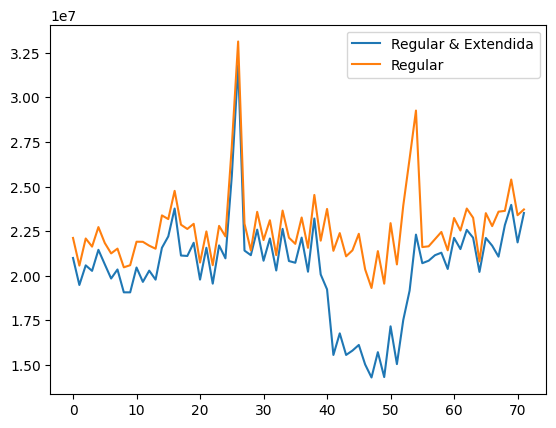

In [75]:
# comparação dos períodos com Promo Regualar + extendida e período apenas com Promo Regular (sem Promo extendida)
# nota-se um comportamento de vendas muito semelhante, porém em volume apenas a Promo Regular ativa tem vendas maiores. 
# nota-se uma que das vendas em um período específico
aux1 = df4.loc[ (df4['promo'] == 1) & (df4['promo2'] == 1), ['year_week', 'sales'] ].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4.loc[ (df4['promo'] == 1) & (df4['promo2'] == 0), ['year_week', 'sales'] ].groupby('year_week').sum().reset_index()
aux2.plot( ax=ax)

ax.legend(labels= ['Regular & Extendida', 'Regular'])


### 4.3. Analise Multivariada